In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import seaborn as sns

In [2]:
# Load JSON data
file_name = '/mnt/ssd1/alm-os/sglang_multi_model/wq_match_metric_DataParallelRuntimeSelectionPolicy.CUSTOM_CustomPolicyType.LPM_200_0.2_4096_100.json'
with open(file_name, 'r') as file:
    data = json.load(file)
    
metric_collections = {}
for e in data:
    metric_collections[e['rid']] = [m['prefix_match_len'] for m in e['metrics']]

In [3]:
duplicate = []
for rid, prefixs in metric_collections.items():
    if prefixs[0]/1024 > 0.5 and prefixs[1]/1024 > 0.5:
        duplicate.append((rid, prefixs))
len(duplicate)

115

In [4]:
def read_prefix_traces(prefix_fpaths, prefix_rids):
    prefix_traces = {}
    hit_rate = [[] for _ in prefix_fpaths]
    for i, f in enumerate(prefix_fpaths):
        with open(f, 'r') as file:
            data = json.load(file)
            for batch in data:
                for rid, prefix in batch.items():
                    if rid not in prefix_rids:
                        continue
                    prefix_traces[rid] = (i, prefix)
                    hit_rate[i].append(prefix/1024)
    return prefix_traces, hit_rate

In [5]:
lpm_prefix_fpaths = ['/mnt/ssd1/alm-os/sglang_multi_model/wq_match_server_0_prefix_hit_trace_DataParallelRuntimeSelectionPolicy.CUSTOM_CustomPolicyType.LPM_200_0.2_4096_100.json', '/mnt/ssd1/alm-os/sglang_multi_model/wq_match_server_1_prefix_hit_trace_DataParallelRuntimeSelectionPolicy.CUSTOM_CustomPolicyType.LPM_200_0.2_4096_100.json']
lpm_prefix_traces, lpm_hit_rate = read_prefix_traces(lpm_prefix_fpaths, metric_collections)

In [6]:
np.mean(lpm_hit_rate[0]), np.mean(lpm_hit_rate[1])

(0.3246165132375605, 0.42233490525630485)

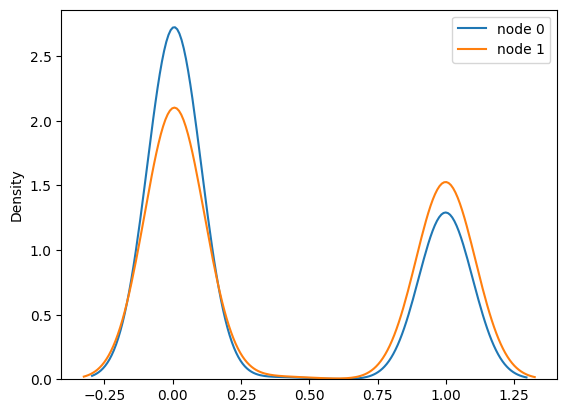

In [7]:
sns.kdeplot(lpm_hit_rate[0], label='node 0')
sns.kdeplot(lpm_hit_rate[1], label='node 1')
plt.legend()

In [8]:
not_matched = []
prefix_pair = []
for rid, ps in metric_collections.items():
    dest = max(range(len(ps)), key=lambda i: ps[i])
    prefix_in_metric = max(ps)
    actual_dest, actual_prefix = lpm_prefix_traces[rid]
    if not (max(ps) < 1024 * 0.02 or min(ps) >= 1024 * 0.8) and dest != actual_dest:
        not_matched.append((rid, dest, actual_dest, ps, actual_prefix))
    prefix_pair.append((prefix_in_metric, actual_prefix))
not_matched

[]

(array([2.730e+02, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 2.000e+00,
        3.814e+03, 0.000e+00, 0.000e+00, 3.000e+00]),
 array([-1022. ,  -872.2,  -722.4,  -572.6,  -422.8,  -273. ,  -123.2,
           26.6,   176.4,   326.2,   476. ]),
 <BarContainer object of 10 artists>)

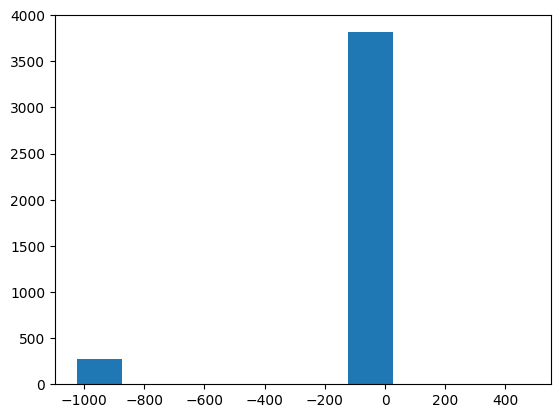

In [9]:
diff = [p[0] - p[1] for p in prefix_pair]
plt.hist(diff, label='prefix difference')

In [15]:
max(diff)

1

In [13]:
hit_rate = [x/1024 for x, y in prefix_pair]

In [14]:
np.mean(hit_rate)

0.7760442899114774

In [10]:
# Load JSON data
file_name = '/mnt/ssd1/alm-os/sglang_multi_model/test_basic_metrics_server_DataParallelRuntimeSelectionPolicy.CUSTOM_200_0.2_4096_100.json'
with open(file_name, 'r') as file:
    data = json.load(file)
    
metric_collections = {}
for e in data:
    if not e['text'].startswith('Workload'):
        continue
    workload = int(e['text'].split(' ')[1])
    runtime = int(e['selected_runtime'])
    if workload not in metric_collections:
        metric_collections[workload] = [0, 0]
    metric_collections[workload][runtime] += 1

In [12]:
metric_collections

{10: [12, 5],
 139: [12, 4],
 122: [10, 6],
 43: [11, 6],
 93: [8, 8],
 160: [8, 8],
 98: [3, 13],
 100: [7, 9],
 164: [11, 5],
 59: [7, 10],
 78: [6, 10],
 3: [16, 1],
 171: [9, 7],
 145: [8, 8],
 183: [8, 8],
 194: [12, 4],
 156: [6, 10],
 114: [10, 6],
 151: [8, 8],
 70: [6, 11],
 147: [9, 7],
 20: [6, 11],
 76: [10, 6],
 18: [7, 10],
 188: [10, 6],
 79: [13, 3],
 146: [7, 9],
 96: [6, 10],
 113: [7, 9],
 86: [11, 5],
 138: [12, 4],
 5: [11, 6],
 165: [6, 10],
 73: [4, 13],
 104: [7, 9],
 133: [4, 12],
 4: [9, 8],
 187: [8, 8],
 186: [12, 4],
 128: [7, 9],
 167: [13, 3],
 58: [12, 5],
 85: [9, 7],
 27: [12, 5],
 57: [8, 9],
 181: [7, 9],
 33: [11, 6],
 121: [3, 13],
 9: [8, 9],
 180: [9, 7],
 116: [13, 3],
 131: [5, 11],
 149: [9, 7],
 108: [13, 3],
 32: [10, 7],
 39: [5, 12],
 125: [9, 7],
 0: [4, 13],
 97: [6, 10],
 53: [8, 9],
 38: [8, 9],
 55: [8, 9],
 112: [8, 8],
 61: [12, 5],
 47: [9, 8],
 127: [9, 7],
 62: [9, 8],
 90: [5, 11],
 185: [9, 7],
 41: [3, 14],
 36: [10, 7],
 35: 

In [23]:
# Load JSON data
file_name = '/mnt/ssd1/alm-os/sglang_multi_model/0.8_test_basic_metrics_server_DataParallelRuntimeSelectionPolicy.CUSTOM_200_0.2_4096_100.json'
with open(file_name, 'r') as file:
    data = json.load(file)
    
metric_collections = {}
for e in data:
    if not e['text'].startswith('Workload'):
        continue
    workload = int(e['text'].split(' ')[1])
    runtime = int(e['selected_runtime'])
    if workload not in metric_collections:
        metric_collections[workload] = [0, 0]
    metric_collections[workload][runtime] += 1
metric_collections

{10: [17, 0],
 139: [0, 16],
 43: [0, 17],
 122: [16, 0],
 93: [0, 16],
 160: [0, 16],
 98: [0, 16],
 100: [16, 0],
 164: [16, 0],
 59: [0, 17],
 3: [0, 17],
 78: [16, 0],
 194: [16, 0],
 145: [10, 6],
 156: [13, 3],
 114: [16, 0],
 171: [0, 16],
 151: [0, 16],
 183: [0, 16],
 70: [0, 17],
 147: [16, 0],
 20: [0, 17],
 96: [16, 0],
 76: [7, 9],
 146: [16, 0],
 18: [0, 17],
 188: [0, 16],
 113: [9, 7],
 79: [16, 0],
 165: [4, 12],
 138: [16, 0],
 73: [0, 17],
 5: [0, 17],
 86: [16, 0],
 133: [0, 16],
 104: [0, 16],
 4: [0, 17],
 187: [16, 0],
 186: [16, 0],
 167: [0, 16],
 128: [16, 0],
 58: [17, 0],
 57: [17, 0],
 121: [0, 16],
 27: [17, 0],
 181: [7, 9],
 33: [0, 17],
 85: [0, 16],
 9: [17, 0],
 149: [16, 0],
 116: [16, 0],
 131: [0, 16],
 39: [17, 0],
 180: [16, 0],
 125: [8, 8],
 108: [0, 16],
 97: [0, 16],
 0: [0, 17],
 32: [17, 0],
 53: [17, 0],
 38: [17, 0],
 55: [0, 17],
 112: [10, 6],
 61: [17, 0],
 127: [16, 0],
 62: [0, 17],
 47: [0, 17],
 185: [0, 16],
 41: [17, 0],
 90: [16

In [30]:
# Load JSON data
file_name = '/mnt/ssd1/alm-os/sglang_multi_model/test_basic_metrics_server_DataParallelRuntimeSelectionPolicy.CUSTOM_CustomPolicyType.ORACLE_200_0.2_4096_100.json'
with open(file_name, 'r') as file:
    data = json.load(file)
    
oracle_trace = {}
predix_rids = set()
for rid, text in data.items():
    if not text.startswith('Workload'):
        continue
    predix_rids.add(rid)
    workload = int(text.split(' ')[1])
    runtime = workload % 2
    if workload not in oracle_trace:
        oracle_trace[workload] = []
    oracle_trace[workload].append(rid)
    
oracle_prefix_fpaths = ['/mnt/ssd1/alm-os/sglang_multi_model/server_0_prefix_hit_trace_DataParallelRuntimeSelectionPolicy.CUSTOM_CustomPolicyType.ORACLE_200_0.2_4096_100.json', '/mnt/ssd1/alm-os/sglang_multi_model/server_1_prefix_hit_trace_DataParallelRuntimeSelectionPolicy.CUSTOM_CustomPolicyType.ORACLE_200_0.2_4096_100.json']
oracle_prefix_traces, oracle_hit_rate = read_prefix_traces(oracle_prefix_fpaths, predix_rids)

In [31]:
np.mean(oracle_hit_rate[0]), np.mean(oracle_hit_rate[1])

(0.8412913041819292, 0.8534238114316239)

In [47]:
def get_workload_prefix_trace(wid, wid_2_rids, prefix_traces):
    l = []
    for rid in wid_2_rids[wid]:
        l.append(prefix_traces[rid][1])
    return l

In [48]:
get_workload_prefix_trace(10, oracle_trace, oracle_prefix_traces)

[1,
 1023,
 1023,
 6,
 1023,
 1023,
 1023,
 1023,
 1023,
 1023,
 1023,
 1023,
 1023,
 1023,
 1023,
 1023,
 1023]